In [30]:
from vizdoom import * 
import random
import time 
import numpy as np
from gym import spaces
import cv2
from matplotlib import pyplot as plt

# 1. Get image of the game and frame processor

In [932]:
# Setup game
game = DoomGame()
game.load_config('cig.cfg')
game.add_game_args('-host 1 -deathmatch +viz_nocheat 0 +cl_run 1 +name AI +colorset 4 +sv_forcerespawn 1 +sv_respawnprotect 1 +sv_nocrouch 1 +sv_noexit 1')
game.set_mode(Mode.PLAYER)
game.set_console_enabled(True)
game.set_screen_resolution(ScreenResolution.RES_320X240)
game.set_screen_format(ScreenFormat.RGB24)
game.init()
game.advance_action(100)
state = game.get_state().screen_buffer
game.close()

VIZ_Close: instance id: DiyicJ1YUC
ViZDoom 1.1.14 (ZDOOM 2.8.1) - SDL version
Compiled on Jan 11 2023

D_DoomInit: Static RNGseed -394608073 set.
M_LoadDefaults: Load system defaults.
Gameinfo scan took 0 ms
W_Init: Init WADfiles.
 adding /opt/homebrew/Caskroom/miniconda/base/envs/vizdoom/lib/python3.10/site-packages/vizdoom/vizdoom.pk3, 583 lumps
 adding /opt/homebrew/Caskroom/miniconda/base/envs/vizdoom/lib/python3.10/site-packages/vizdoom/freedoom2.wad, 3649 lumps
 adding cig.wad, 15 lumps
viz_controlled is write protected.
viz_instance_id is write protected.
viz_nosound is write protected.
viz_nocheat is write protected.
I_Init: Setting up machine state.
V_Init: allocate screen.
S_Init: Setting up sound.
ST_Init: Init startup screen.
Checking cmd-line parameters...
S_InitData: Load sound definitions.
G_ParseMapInfo: Load map definitions.
Texman.Init: Init texture manager.
ParseTeamInfo: Load team definitions.
LoadActors: Load actor definitions.
R_Init: Init Doom refresh subsystem.


1   HIToolbox                           0x000000019589c5c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x000000019589c188 _ZN15MenuBarInstance14EnableAutoShowEv + 60
3   HIToolbox                           0x000000019583f310 SetMenuBarObscured + 372
4   HIToolbox                           0x000000019583eee8 _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 172
5   HIToolbox                           0x0000000195838fcc _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 296
6   HIToolbox                           0x00000001957ffcd0 _NotifyEventLoopObservers + 176
7   HIToolbox                           0x000000019583896c AcquireEventFromQueue + 432
8   HIToolbox                           0x0000000195827c84 ReceiveNextEventCommon + 320
9   HIToolbox                           0x0000000195827b2c _BlockUntilNextEventMatchingListInModeWithFilter + 72
10  AppKit                              0x000000018f3d4424 _DPS

VIZ_Close: instance id: 2AM6JeJcxz


In [933]:
def frame_processor(observation):
    state = cv2.resize(observation[50:-50, :], None, fx=.5, fy=.5, interpolation=cv2.INTER_CUBIC)
    return state

In [935]:
state.shape, frame_processor(state).shape

((240, 320, 3), (70, 160, 3))

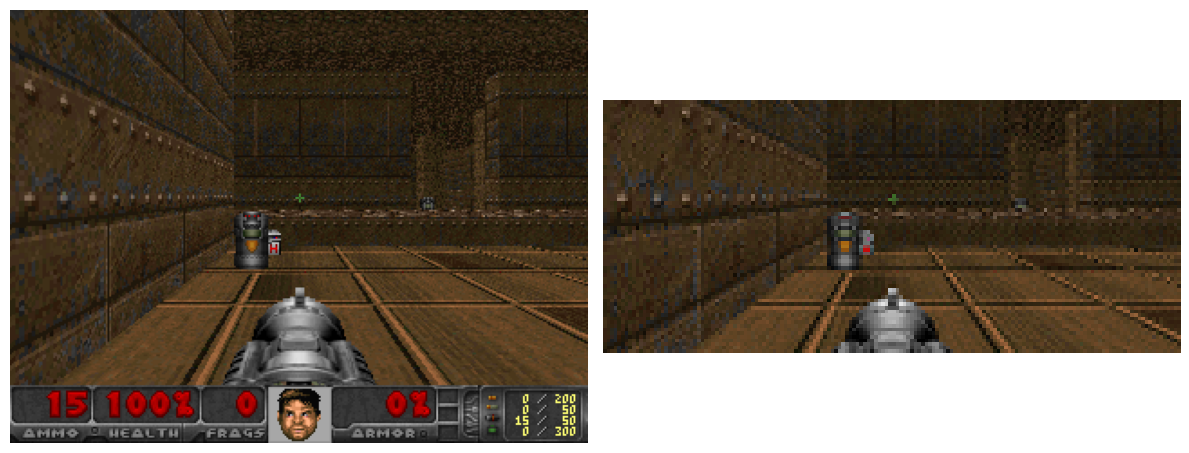

In [903]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(state)
ax[1].imshow(frame_processor(state))
# disable axis
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout()

In [907]:
# Setup game
game = DoomGame()
game.load_config('../../scenarios/basic.cfg')
game.set_mode(Mode.PLAYER)
game.set_console_enabled(True)
game.set_screen_resolution(ScreenResolution.RES_320X240)
game.set_screen_format(ScreenFormat.RGB24)
game.init()
state = game.get_state().screen_buffer
game.close()

ViZDoom 1.1.14 (ZDOOM 2.8.1) - SDL version
Compiled on Jan 11 2023

D_DoomInit: Static RNGseed 1515467223 set.
M_LoadDefaults: Load system defaults.
Gameinfo scan took 0 ms
W_Init: Init WADfiles.
 adding /opt/homebrew/Caskroom/miniconda/base/envs/vizdoom/lib/python3.10/site-packages/vizdoom/vizdoom.pk3, 583 lumps
 adding /opt/homebrew/Caskroom/miniconda/base/envs/vizdoom/lib/python3.10/site-packages/vizdoom/freedoom2.wad, 3649 lumps
 adding ../../scenarios/basic.wad, 7 lumps
viz_controlled is write protected.
viz_instance_id is write protected.
viz_nosound is write protected.
I_Init: Setting up machine state.
V_Init: allocate screen.
S_Init: Setting up sound.
ST_Init: Init startup screen.
Checking cmd-line parameters...
S_InitData: Load sound definitions.
G_ParseMapInfo: Load map definitions.
Texman.Init: Init texture manager.
ParseTeamInfo: Load team definitions.
LoadActors: Load actor definitions.
R_Init: Init Doom refresh subsystem.
DecalLibrary: Load decals.
Adding dehacked patch f

1   HIToolbox                           0x000000019589c5c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x000000019589c188 _ZN15MenuBarInstance14EnableAutoShowEv + 60
3   HIToolbox                           0x000000019583f310 SetMenuBarObscured + 372
4   HIToolbox                           0x000000019583eee8 _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 172
5   HIToolbox                           0x0000000195838fcc _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 296
6   HIToolbox                           0x00000001957ffcd0 _NotifyEventLoopObservers + 176
7   HIToolbox                           0x000000019583896c AcquireEventFromQueue + 432
8   HIToolbox                           0x0000000195827c84 ReceiveNextEventCommon + 320
9   HIToolbox                           0x0000000195827b2c _BlockUntilNextEventMatchingListInModeWithFilter + 72
10  AppKit                              0x000000018f3d4424 _DPS

In [917]:
def frame_processor(observation):
    observation = cv2.cvtColor(observation, cv2.COLOR_RGB2GRAY)
    state = cv2.resize(observation[50:-50, :], None, fx=.5, fy=.5, interpolation=cv2.INTER_CUBIC)
    return state

In [940]:
frame_processor(state).shape

(70, 160, 3)

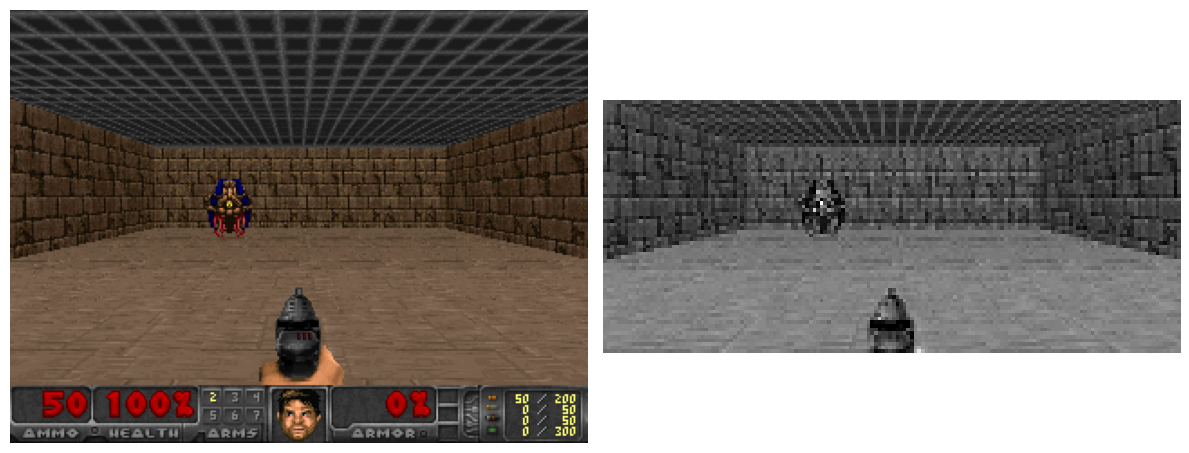

In [912]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.set_cmap('gray')
ax[0].imshow(state)
ax[1].imshow(frame_processor(state))
# disable axis
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout()

In [927]:
# Setup game
game = DoomGame()
game.load_config('../../scenarios/deadly_corridor.cfg')
game.set_mode(Mode.PLAYER)
game.set_console_enabled(True)
game.set_screen_resolution(ScreenResolution.RES_320X240)
game.set_screen_format(ScreenFormat.RGB24)
game.init()
game.advance_action(40)
state = game.get_state().screen_buffer
game.close()

ViZDoom 1.1.14 (ZDOOM 2.8.1) - SDL version
Compiled on Jan 11 2023

D_DoomInit: Static RNGseed -630883754 set.
M_LoadDefaults: Load system defaults.
Gameinfo scan took 0 ms
W_Init: Init WADfiles.
 adding /opt/homebrew/Caskroom/miniconda/base/envs/vizdoom/lib/python3.10/site-packages/vizdoom/vizdoom.pk3, 583 lumps
 adding /opt/homebrew/Caskroom/miniconda/base/envs/vizdoom/lib/python3.10/site-packages/vizdoom/freedoom2.wad, 3649 lumps
 adding ../../scenarios/deadly_corridor.wad, 7 lumps
viz_controlled is write protected.
viz_instance_id is write protected.
viz_nosound is write protected.
I_Init: Setting up machine state.
V_Init: allocate screen.
S_Init: Setting up sound.
ST_Init: Init startup screen.
Checking cmd-line parameters...
S_InitData: Load sound definitions.
G_ParseMapInfo: Load map definitions.
Texman.Init: Init texture manager.
ParseTeamInfo: Load team definitions.
LoadActors: Load actor definitions.
R_Init: Init Doom refresh subsystem.
DecalLibrary: Load decals.
Adding dehack

1   HIToolbox                           0x000000019589c5c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x000000019589c188 _ZN15MenuBarInstance14EnableAutoShowEv + 60
3   HIToolbox                           0x000000019583f310 SetMenuBarObscured + 372
4   HIToolbox                           0x000000019583eee8 _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 172
5   HIToolbox                           0x0000000195838fcc _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 296
6   HIToolbox                           0x00000001957ffcd0 _NotifyEventLoopObservers + 176
7   HIToolbox                           0x000000019583896c AcquireEventFromQueue + 432
8   HIToolbox                           0x0000000195827c84 ReceiveNextEventCommon + 320
9   HIToolbox                           0x0000000195827b2c _BlockUntilNextEventMatchingListInModeWithFilter + 72
10  AppKit                              0x000000018f3d4424 _DPS

VIZ_Close: instance id: iKUHr9Mz0f


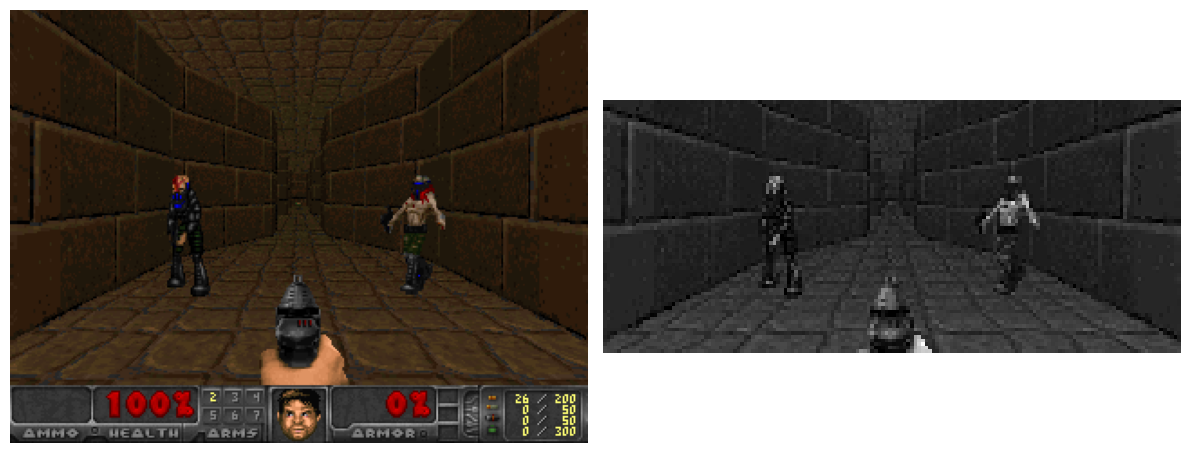

In [928]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.set_cmap('gray')
ax[0].imshow(state)
ax[1].imshow(frame_processor(state))
# disable axis
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout()

# 2. Test CNN

In [954]:
import gym
import torch
from torch import nn, Tensor
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3 import PPO
from DeathmatchEnv import DoomWithBots
from stable_baselines3.common import vec_env
from stable_baselines3.common.callbacks import EvalCallback
from gym 


In [989]:
state.shape

(240, 320, 3)

In [988]:
frame_processor(state).shape

(70, 160, 3)

In [955]:
import os
from stable_baselines3.common.callbacks import BaseCallback

class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'model{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [949]:
def vec_env_with_bots(n_envs=2):
    return vec_env.VecTransposeImage(vec_env.DummyVecEnv([lambda: DoomWithBots(render=False)] * n_envs))

env = vec_env_with_bots(1)

ViZDoom 1.1.14 (ZDOOM 2.8.1) - SDL version
Compiled on Jan 11 2023

D_DoomInit: Static RNGseed -931897672 set.
M_LoadDefaults: Load system defaults.
Gameinfo scan took 0 ms
W_Init: Init WADfiles.
 adding /opt/homebrew/Caskroom/miniconda/base/envs/vizdoom/lib/python3.10/site-packages/vizdoom/vizdoom.pk3, 583 lumps
 adding /opt/homebrew/Caskroom/miniconda/base/envs/vizdoom/lib/python3.10/site-packages/vizdoom/freedoom2.wad, 3649 lumps
 adding cig.wad, 15 lumps
viz_controlled is write protected.
viz_instance_id is write protected.
viz_window_hidden is write protected.
viz_nosound is write protected.
viz_nocheat is write protected.
I_Init: Setting up machine state.
V_Init: allocate screen.
S_Init: Setting up sound.
ST_Init: Init startup screen.
Checking cmd-line parameters...
S_InitData: Load sound definitions.
G_ParseMapInfo: Load map definitions.
Texman.Init: Init texture manager.
ParseTeamInfo: Load team definitions.
LoadActors: Load actor definitions.
R_Init: Init Doom refresh subsyste

In [956]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path='models')

In [985]:
class CustomCNN(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.spaces.Box, features_dim: int = 128, **kwargs):
        super().__init__(observation_space, features_dim)

        self.cnn = nn.Sequential(
                nn.LayerNorm([3, 70, 160]),
                
                nn.Conv2d(3, 32, kernel_size=8, stride=4, padding=0, bias=False),
                nn.BatchNorm2d(32),
                nn.ReLU(),

                nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=0, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(),

                nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0, bias=False),
                nn.LayerNorm([64, 5, 16]),
                nn.LeakyReLU(**kwargs),

                nn.Flatten(),
        )

        self.linear = nn.Sequential(
                nn.Linear(4, features_dim, bias=False),
                nn.LeakyReLU(**kwargs),
            )

    def forward(self, observations: Tensor) -> Tensor:
        return self.linear(self.cnn(observations))


def init_net(m: nn.Module):
    if len(m._modules) > 0:
        for subm in m._modules:
            init_net(m._modules[subm])
    elif isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(
            m.weight,
            a=0.1,  # Same as the leakiness parameter for LeakyReLu.
            mode='fan_in',  # Preserves magnitude in the forward pass.
            nonlinearity='leaky_relu')

In [972]:
agent_args = {
    'n_epochs': 3,
    'n_steps': 4096,
    'learning_rate': 1e-4,
    'batch_size': 32,
    'policy_kwargs': {'features_extractor_class': CustomCNN}
}


In [986]:
model = PPO('CnnPolicy', env, verbose=1)

Using cpu device


In [987]:
model.learn(total_timesteps=3000000, callback=callback)

Static rngseed 8922154 will be set for next game
Removed all bots
Bond joined the game
Leone joined the game
Jones joined the game
MacGyver joined the game
Blazkowicz joined the game
T800 joined the game
Plissken joined the game
Conan joined the game
Predator joined the game
Conan stood where Predator was teleporting.
McClane joined the game
Rambo joined the game
Plissken stood where Rambo was teleporting.
Ripley joined the game
T800 stood where Ripley was teleporting.


map01 - Hydroelectric Plant

*** DEATHMATCH RESULTS ***
 - AI: 0
Removed all bots
Blazkowicz joined the game
Leone joined the game
Jones joined the game
Anderson joined the game
Dredd joined the game
Anderson stood where Dredd was teleporting.
Conan joined the game
AI stood where Conan was teleporting.
McClane joined the game
Predator joined the game
Plissken joined the game
Blazkowicz stood where Plissken was teleporting.
Machete joined the game
Plissken stood where Machete was teleporting.
MacGyver joined the game
Le

ViZDoomErrorException: Script error, "MAP01" line 1:
Unterminated string constant
